<a href="https://colab.research.google.com/github/reagenhuskey/cs290/blob/main/gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal

In [45]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [46]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# SciKit Learn

In [47]:
from sklearn.mixture import GaussianMixture

In [48]:
gm = GaussianMixture(n_components=3)
gm.fit(df)

GaussianMixture(n_components=3)

In [49]:
gm.weights_

array([0.30127092, 0.33333333, 0.36539575])

In [50]:
gm.means_

array([[5.9170732 , 2.77804839, 4.20540364, 1.29848217],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54639415, 2.94946365, 5.48364578, 1.98726565]])

In [51]:
gm.covariances_

array([[[0.2755171 , 0.09662295, 0.18547072, 0.05478901],
        [0.09662295, 0.09255152, 0.09103431, 0.04299899],
        [0.18547072, 0.09103431, 0.20235849, 0.06171383],
        [0.05478901, 0.04299899, 0.06171383, 0.03233775]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.38744093, 0.09223276, 0.30244302, 0.06087397],
        [0.09223276, 0.11040914, 0.08385112, 0.05574334],
        [0.30244302, 0.08385112, 0.32589574, 0.07276776],
        [0.06087397, 0.05574334, 0.07276776, 0.08484505]]])

In [52]:
gm.converged_

True

In [53]:
gm.n_iter_

17

In [54]:
gm.predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
gm.predict_proba(df).round(3)

array([[0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.

In [56]:
X_new, y_new = gm.sample(6)
X_new

array([[5.67431389, 2.75883049, 3.85498753, 1.11629223],
       [5.7308496 , 2.71729898, 3.90545187, 1.26414198],
       [5.79045482, 2.37150641, 3.73054178, 1.04142344],
       [6.00790324, 3.0895965 , 4.25838391, 1.48197917],
       [5.5279734 , 3.86772704, 1.39280508, 0.29275305],
       [7.05200803, 3.28931735, 6.13175296, 2.33731484]])

In [57]:
y_new

array([0, 0, 0, 0, 1, 2])

In [58]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [64]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X['sepal length (cm)'], X['sepal width (cm)'], 'k.', markersize=2)

    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [65]:
simpdf = df[['sepal length (cm)', 'sepal width (cm)']]

In [66]:
gm_simp = GaussianMixture(n_components=3, n_init=10)
gm_simp.fit(simpdf)

GaussianMixture(n_components=3, n_init=10)

<ipython-input-64-b397e2689d1e>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-64-b397e2689d1e>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

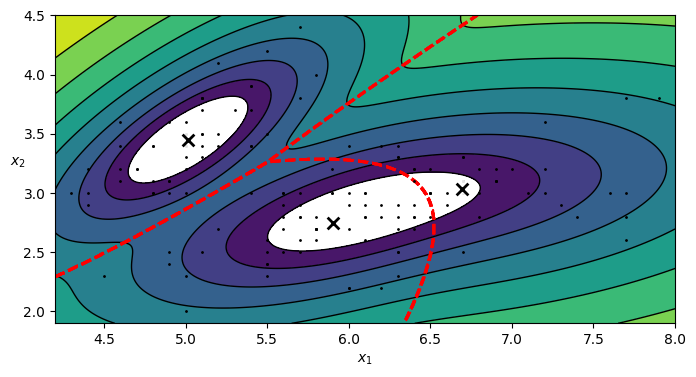

In [67]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm_simp, simpdf)
plt.show()